In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
Agriculture=pd.read_csv("agriculture_dataset.csv")

#Now,lets convert Agriculture Farm_ID column to row name
Agriculture=Agriculture.set_index("Farm_ID")

#Now,lets get the number or rows and columns 
rows,columns=Agriculture.shape
print("Agriculture rows equal to:",rows)
print("Agriculture columns equal to:",columns)
print("\nDataset Information:")
print(Agriculture.info())

print("\nStatistical Analysis about this  dataset:")
display(Agriculture.describe().T.round(3))

#Now,lets separate numerical and categorical columns

Agriculture_numeric=Agriculture.select_dtypes(include=["number"]).columns.tolist()
print("\nThe numeric columns in this dataset are:")
print(Agriculture_numeric)

Categorical_agriculture=Agriculture.select_dtypes(include=["object"]).columns.tolist()
print("\nThe Categorical columns in this dataset are:")
print(Categorical_agriculture)

#Now,i want to get the unique values of all the categorical columns
for y in Categorical_agriculture:
    print(f'\nColumn:{y}')
    print(Agriculture[y].unique())

#Now,we want to check if there are any missing values in our dataset
print(f'\nMissing values: {Agriculture.isna().sum().sum()}')
print(f'Duplicated values: {Agriculture.duplicated().sum()}')


Agriculture rows equal to: 50
Agriculture columns equal to: 9

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, F001 to F050
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Crop_Type                  50 non-null     object 
 1   Farm_Area(acres)           50 non-null     float64
 2   Irrigation_Type            50 non-null     object 
 3   Fertilizer_Used(tons)      50 non-null     float64
 4   Pesticide_Used(kg)         50 non-null     float64
 5   Yield(tons)                50 non-null     float64
 6   Soil_Type                  50 non-null     object 
 7   Season                     50 non-null     object 
 8   Water_Usage(cubic meters)  50 non-null     float64
dtypes: float64(5), object(4)
memory usage: 3.9+ KB
None

Statistical Analysis about this  dataset:


,count,mean,std,min,25%,50%,75%,max
Farm_Area(acres),50.0,254.964,139.418,12.50,135.710,281.980,368.108,483.88
Fertilizer_Used(tons),50.0,4.905,2.733,0.50,2.438,5.045,6.885,9.96
Pesticide_Used(kg),50.0,2.398,1.439,0.14,0.972,2.330,3.418,4.99
Yield(tons),50.0,27.059,13.346,3.86,16.190,28.970,37.860,48.02
Water_Usage(cubic meters),50.0,56724.296,27264.992,5869.75,37818.152,54097.075,82240.032,94754.73



The numeric columns in this dataset are:
['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

The Categorical columns in this dataset are:
['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']

Column:Crop_Type
['Cotton' 'Carrot' 'Sugarcane' 'Tomato' 'Soybean' 'Rice' 'Maize' 'Wheat'
 'Barley' 'Potato']

Column:Irrigation_Type
['Sprinkler' 'Manual' 'Flood' 'Rain-fed' 'Drip']

Column:Soil_Type
['Loamy' 'Peaty' 'Silty' 'Clay' 'Sandy']

Column:Season
['Kharif' 'Zaid' 'Rabi']

Missing values: 0
Duplicated values: 0


## EDA

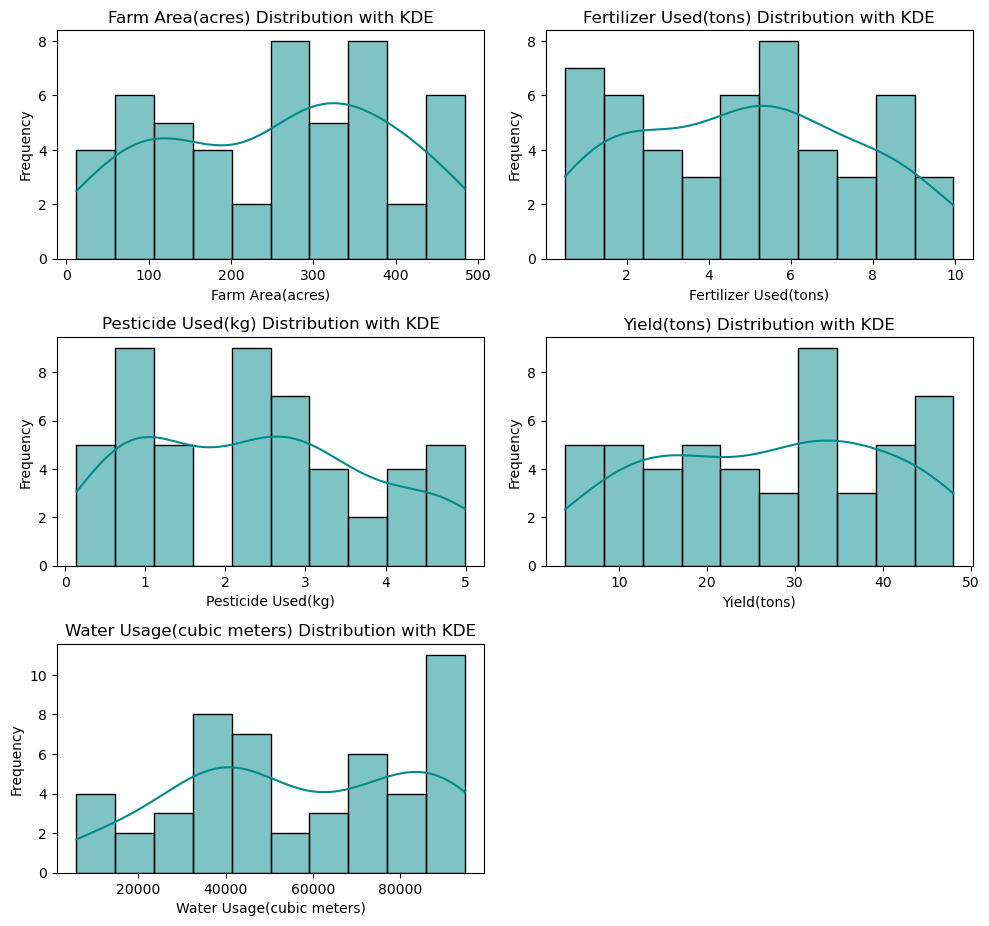

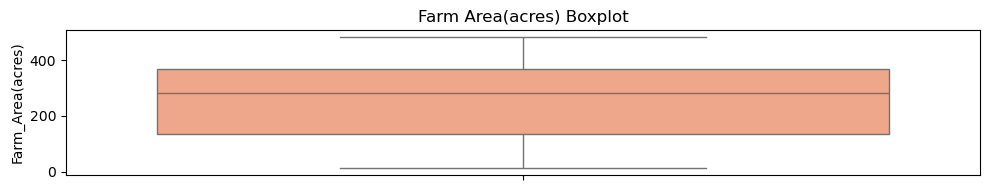


Summary Statistics for each boxplot:
count     50.000000
mean     254.963800
std      139.417782
min       12.500000
25%      135.710000
50%      281.980000
75%      368.107500
max      483.880000
Name: Farm_Area(acres), dtype: float64


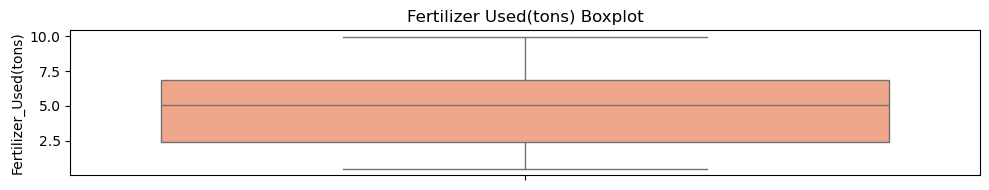


Summary Statistics for each boxplot:
count    50.000000
mean      4.905400
std       2.732689
min       0.500000
25%       2.437500
50%       5.045000
75%       6.885000
max       9.960000
Name: Fertilizer_Used(tons), dtype: float64


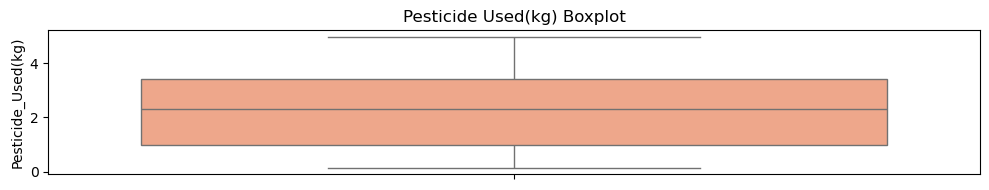


Summary Statistics for each boxplot:
count    50.000000
mean      2.398000
std       1.438613
min       0.140000
25%       0.972500
50%       2.330000
75%       3.417500
max       4.990000
Name: Pesticide_Used(kg), dtype: float64


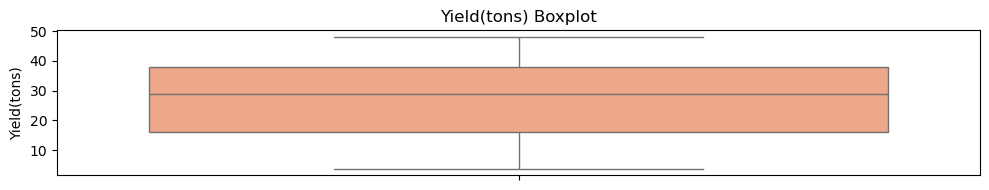


Summary Statistics for each boxplot:
count    50.000000
mean     27.059200
std      13.345789
min       3.860000
25%      16.190000
50%      28.970000
75%      37.860000
max      48.020000
Name: Yield(tons), dtype: float64


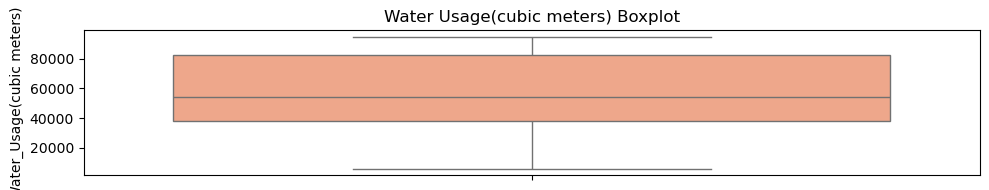


Summary Statistics for each boxplot:
count       50.000000
mean     56724.295600
std      27264.992053
min       5869.750000
25%      37818.152500
50%      54097.075000
75%      82240.032500
max      94754.730000
Name: Water_Usage(cubic meters), dtype: float64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
def numeric(data, columns):
    plt.figure(figsize=(10,12))

    for i,column in enumerate(columns,1):
        plt.subplot(4,2,i)
        sns.histplot(data[column], kde=True, bins=10, color='darkcyan')
        plt.title(f'{column.replace("_"," ")} Distribution with KDE')
        plt.xlabel(column.replace("_"," "))
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
numeric(Agriculture, Agriculture_numeric)

#Now,lets also create some boxplots for the numerical columns
def boxplots(data,columns,title):
    plt.figure(figsize=(10,2))
    sns.boxplot(data[columns], color='lightsalmon')
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()
    print(f'\nSummary Statistics for each boxplot:\n{data[columns].describe()}')
for columns in Agriculture_numeric:
    boxplots(Agriculture,columns,columns.replace("_"," "))

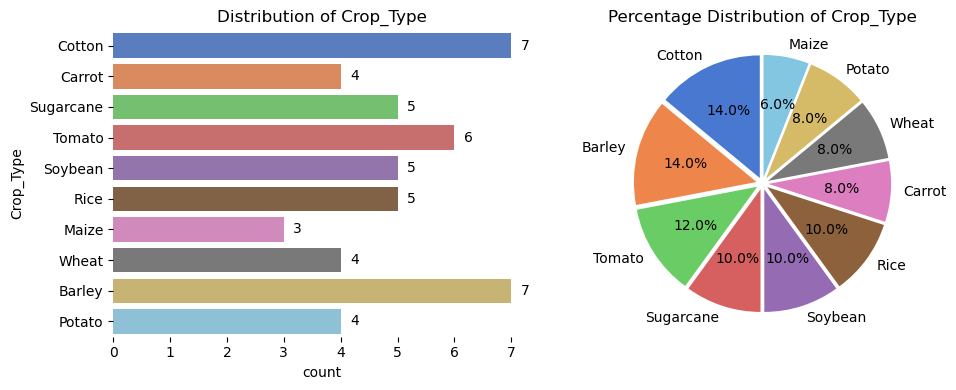

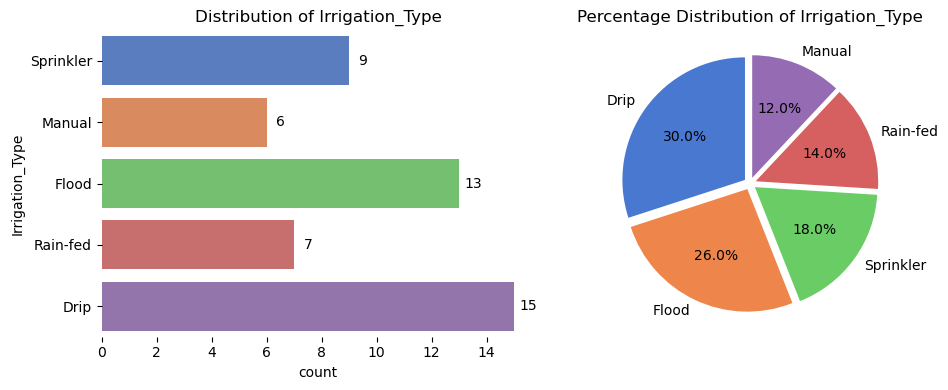

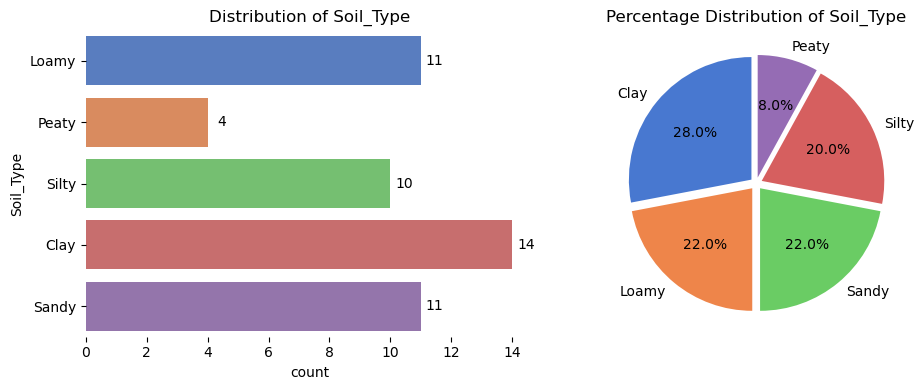

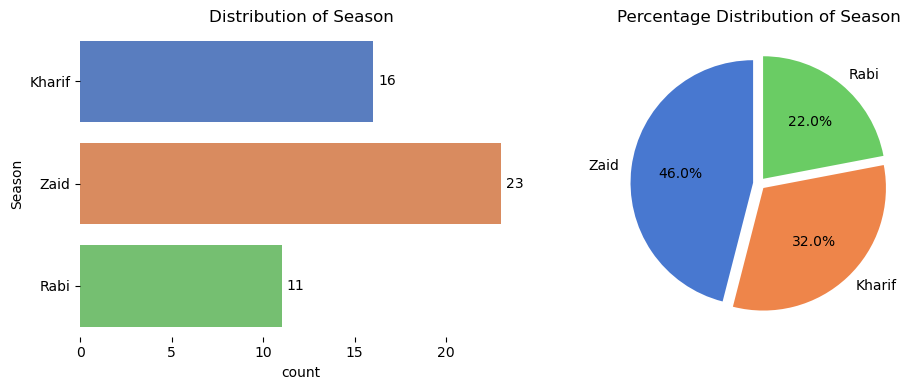

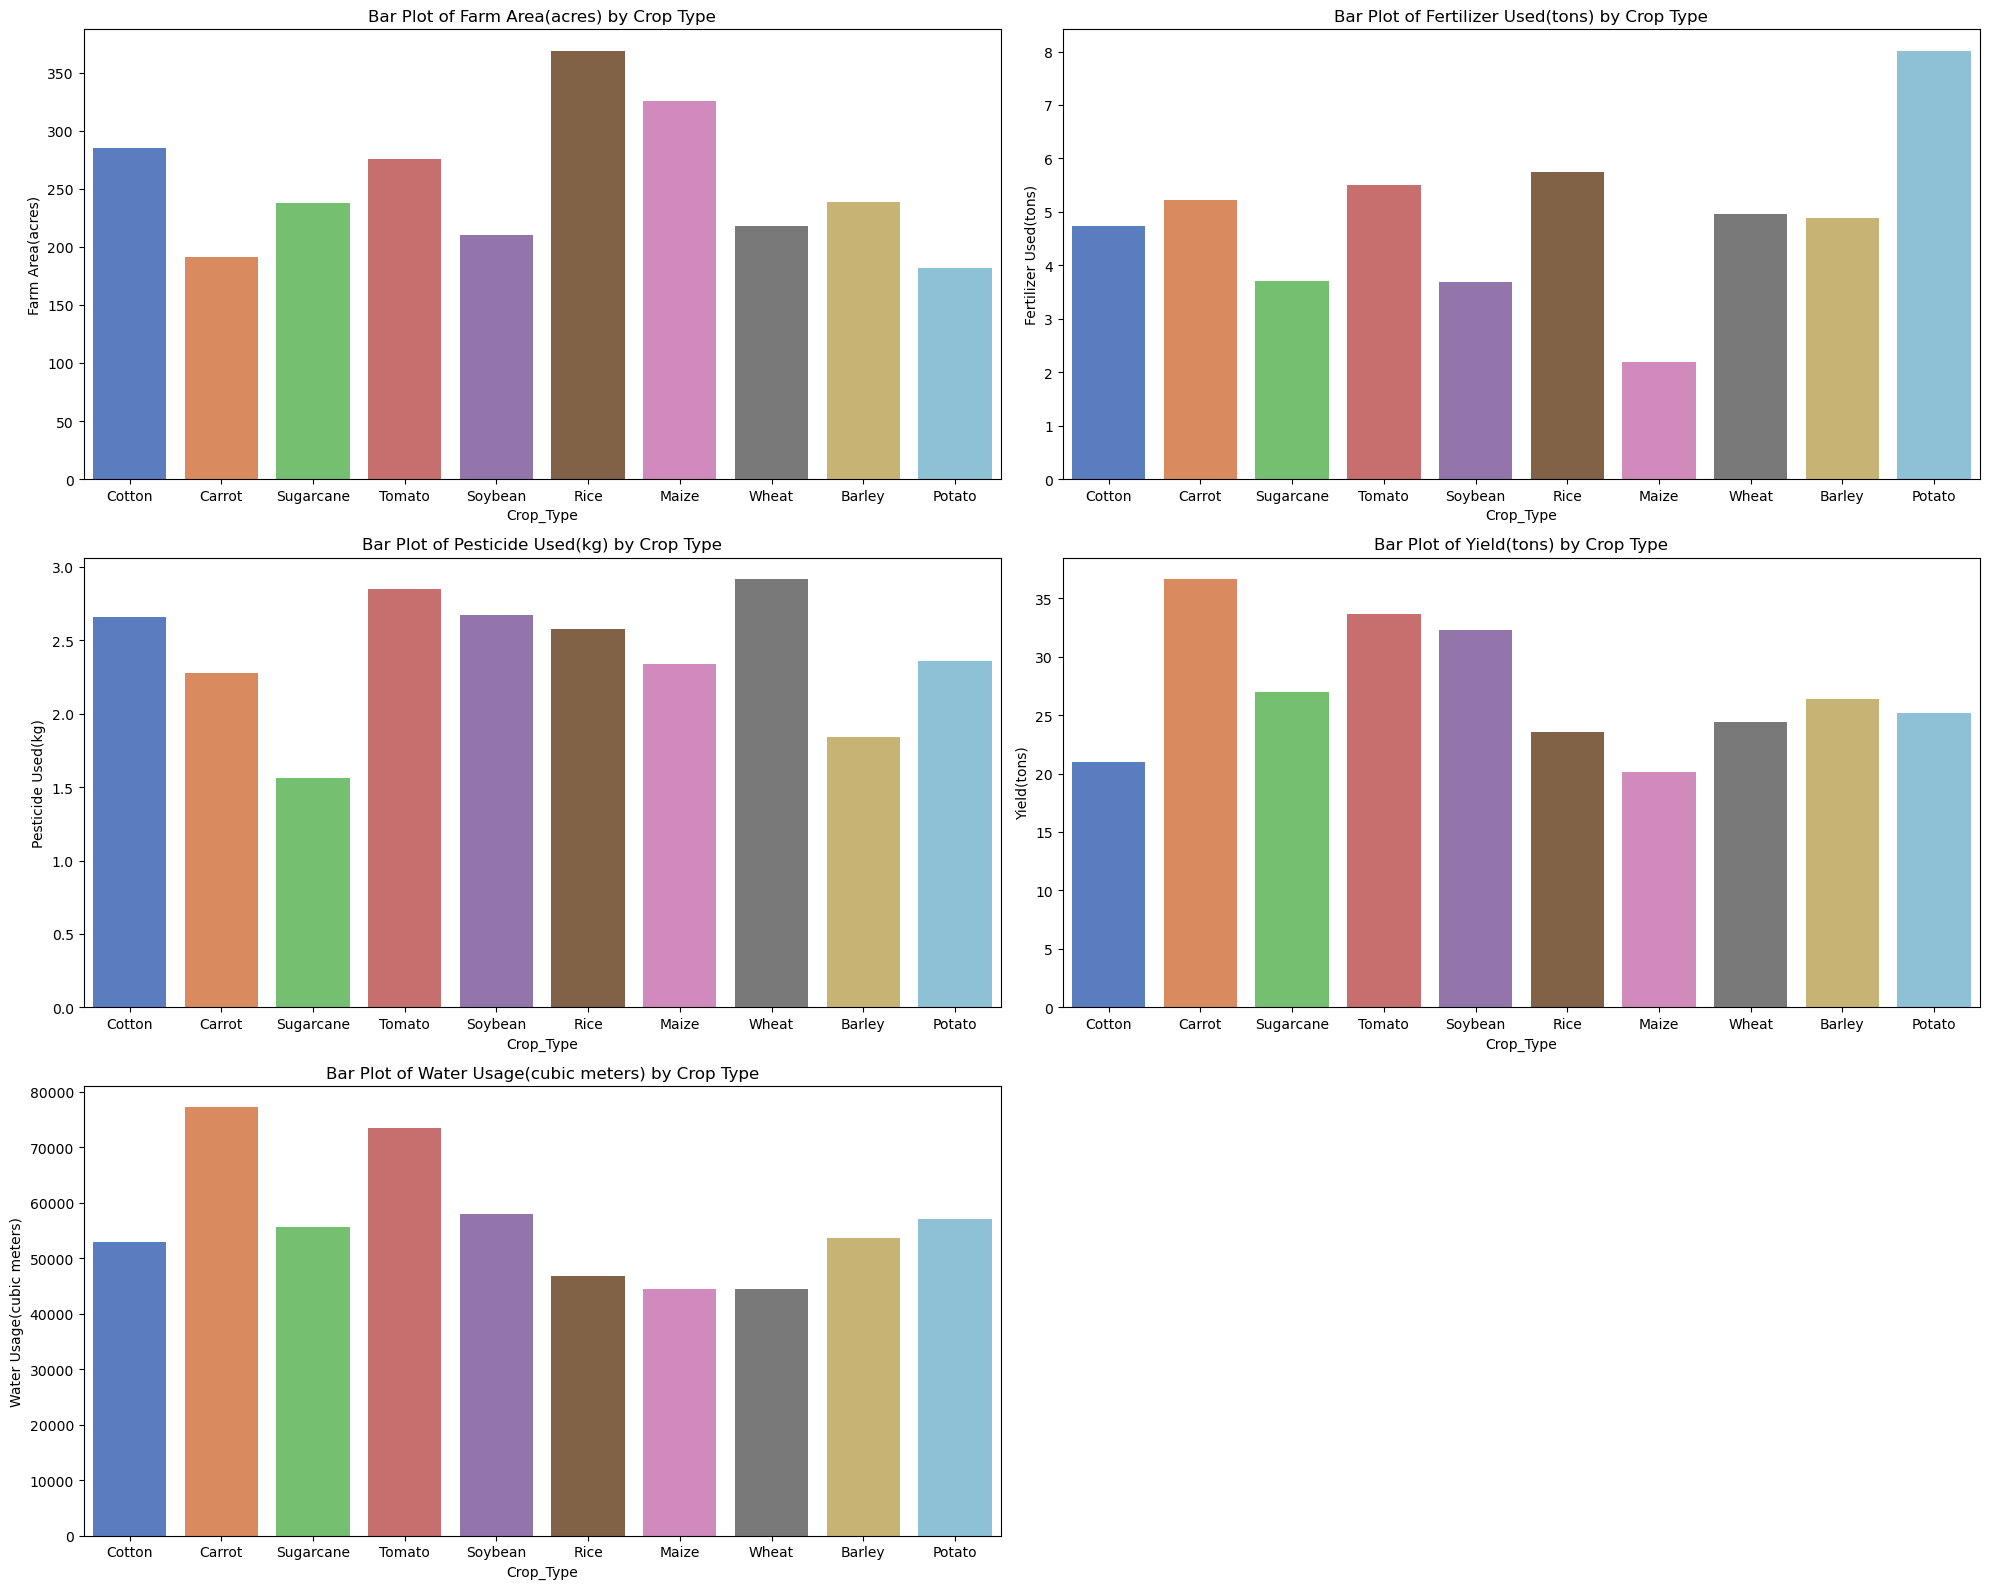

In [4]:
import warnings
warnings.filterwarnings("ignore")
#Now,lets also work on Categorical columns
def categorical_values(column_name, data=Agriculture):
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.countplot(y=column_name, data=Agriculture, palette='muted')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    Agriculture[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*Agriculture[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

categorical_values("Crop_Type", data=Agriculture)
categorical_values("Irrigation_Type")
categorical_values("Soil_Type")
categorical_values("Season")

#Now,lets create some bar plots for the categorical values
Agriculture_numeric=Agriculture.select_dtypes(include=["number"]).columns=Agriculture.select_dtypes(include=["number"]).columns.tolist()
plt.figure(figsize=(20,16))
for i,column in enumerate(Agriculture_numeric,1):
        plt.subplot(3,2,i)
        sns.barplot(data=Agriculture,x='Crop_Type',y=column, ci=None, palette='muted')
        plt.title(f'Bar Plot of {column.replace("_"," ")} by Crop Type')
        plt.xlabel("Crop_Type")
        plt.ylabel(column.replace("_", " "))
plt.tight_layout()
plt.show()


In [5]:
#Now,lets make a metric about the highest crop yield of each crop type and its actual yield
import pandas as pd
final={
    "metric":["Highest yield","Lowest yield","Highest Fertilizer Used","Lowest Fertilizer Used","Highest Pesticide Used","Lowest Pesticide Used",
              "Highest Water Usage","Lowest Water Usage"],
    "Crop_Type":[Agriculture.loc[Agriculture["Yield(tons)"].idxmax()]["Crop_Type"],Agriculture.loc[Agriculture["Yield(tons)"].idxmin()]["Crop_Type"],
                 Agriculture.loc[Agriculture["Fertilizer_Used(tons)"].idxmax()]["Crop_Type"], Agriculture.loc[Agriculture["Fertilizer_Used(tons)"].idxmin()]["Crop_Type"],
                 Agriculture.loc[Agriculture["Pesticide_Used(kg)"].idxmax()]["Crop_Type"],Agriculture.loc[Agriculture["Pesticide_Used(kg)"].idxmin()]["Crop_Type"],
                 Agriculture.loc[Agriculture["Water_Usage(cubic meters)"].idxmax()]["Crop_Type"], Agriculture.loc[Agriculture["Water_Usage(cubic meters)"].idxmin()]["Crop_Type"]],
    "Value":[Agriculture.loc[Agriculture["Yield(tons)"].idxmax()]["Yield(tons)"],Agriculture.loc[Agriculture["Yield(tons)"].idxmin()]["Yield(tons)"],
             Agriculture.loc[Agriculture["Fertilizer_Used(tons)"].idxmax()]["Fertilizer_Used(tons)"],Agriculture.loc[Agriculture["Fertilizer_Used(tons)"].idxmin()]["Fertilizer_Used(tons)"],
             Agriculture.loc[Agriculture["Pesticide_Used(kg)"].idxmax()]["Pesticide_Used(kg)"],Agriculture.loc[Agriculture["Pesticide_Used(kg)"].idxmin()]["Pesticide_Used(kg)"],
             Agriculture.loc[Agriculture["Water_Usage(cubic meters)"].idxmax()]["Water_Usage(cubic meters)"],Agriculture.loc[Agriculture["Water_Usage(cubic meters)"].idxmin()]["Water_Usage(cubic meters)"]]}
final=pd.DataFrame(final)
display(final)

,metric,Crop_Type,Value
0,Highest yield,Tomato,48.02
1,Lowest yield,Maize,3.86
2,Highest Fertilizer Used,Cotton,9.96
3,Lowest Fertilizer Used,Cotton,0.50
4,Highest Pesticide Used,Rice,4.99
5,Lowest Pesticide Used,Barley,0.14
6,Highest Water Usage,Cotton,94754.73
7,Lowest Water Usage,Rice,5869.75


Crop_Type
Cotton       1993.80
Rice         1845.24
Barley       1671.22
Tomato       1655.02
Sugarcane    1187.99
Soybean      1050.68
Maize         978.53
Wheat         872.57
Carrot        765.90
Potato        727.24
Name: Farm_Area(acres), dtype: float64


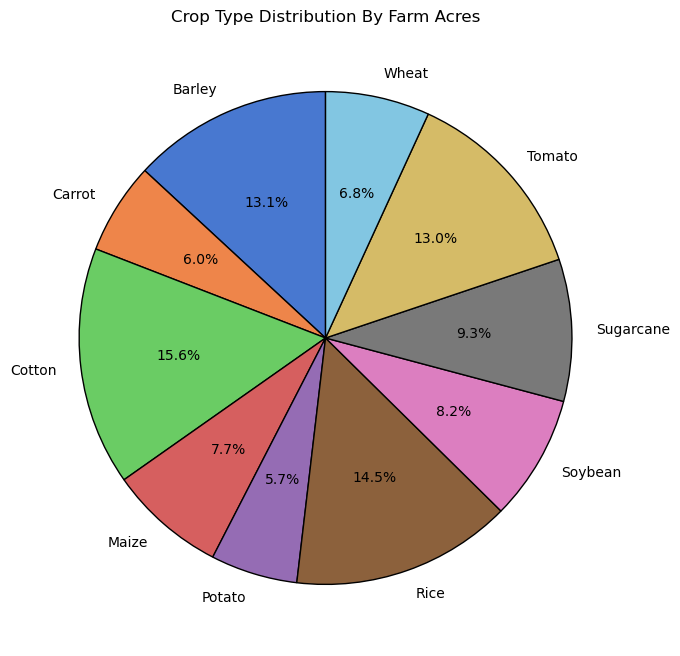

In [6]:
#Now,lets check the total area that each Crop Type is covering
Acres=Agriculture.groupby("Crop_Type")["Farm_Area(acres)"].sum()
print(Acres.sort_values(ascending=False))
plt.figure(figsize=(8,8))
plt.pie(Acres, labels=Acres.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('muted'), wedgeprops={'edgecolor': 'black'})
plt.title("Crop Type Distribution By Farm Acres")
plt.show()

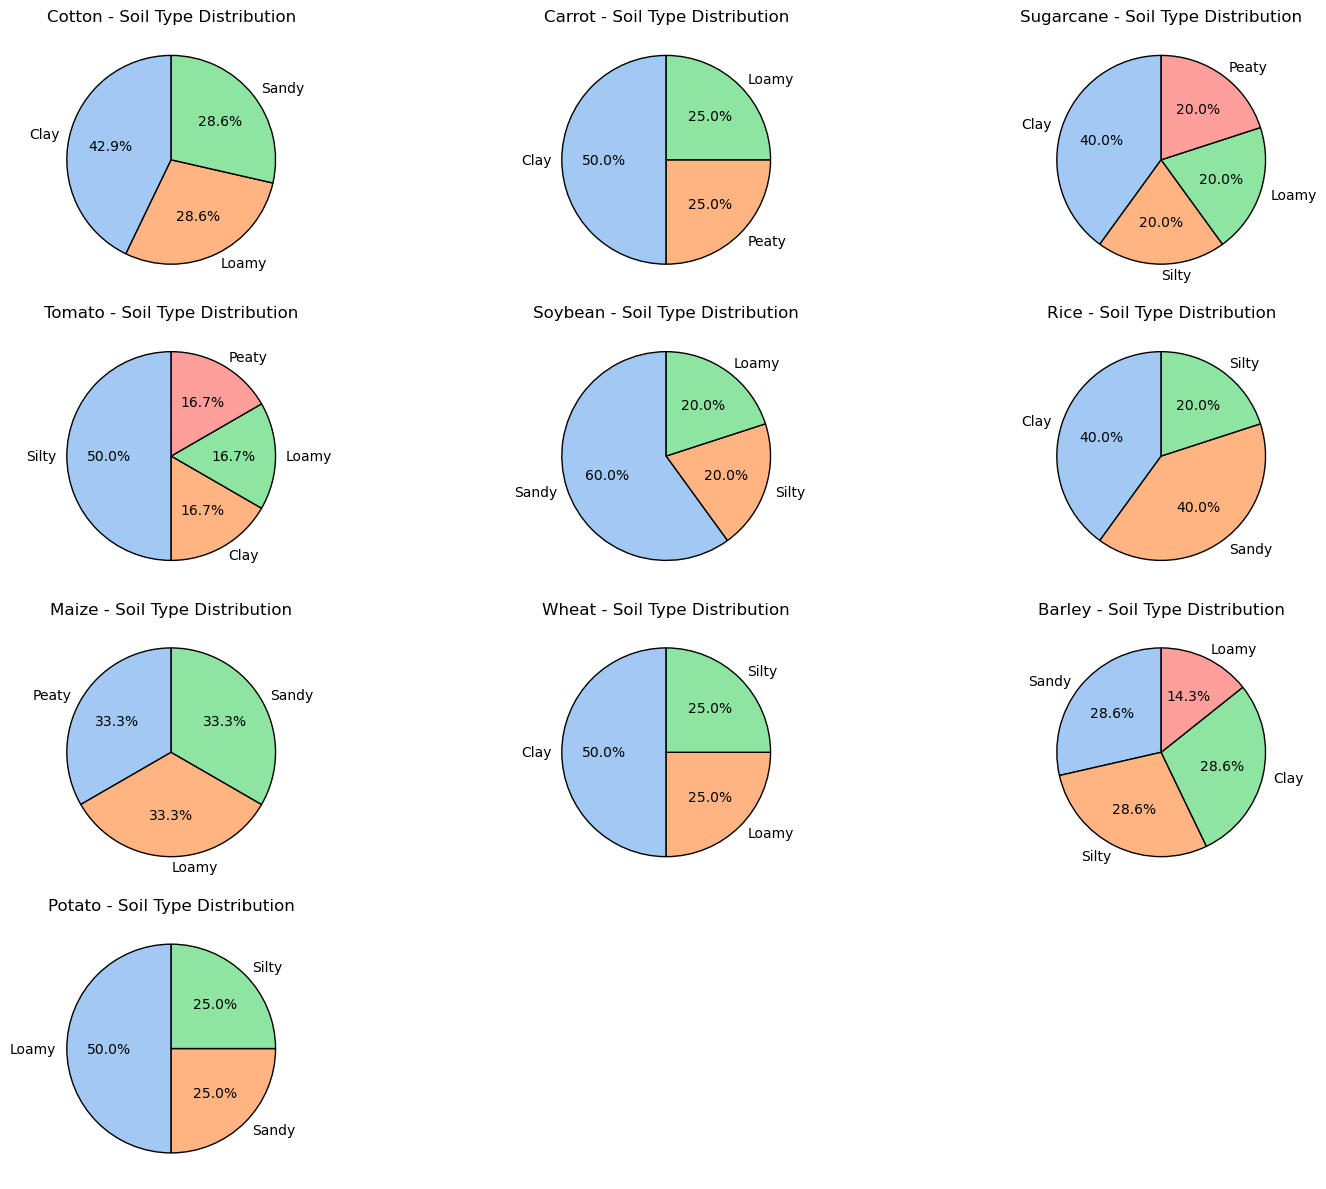

In [7]:
#Now,lets define Crop_Types based on Soil Types
Soil=Agriculture.groupby("Crop_Type")["Soil_Type"].unique().reset_index();Soil
Unique_Crops=Agriculture["Crop_Type"].unique();Unique_Crops

# Set up a grid for multiple pie charts
plt.figure(figsize=(15, 12))
for i, crop in enumerate(Unique_Crops, 1):
    plt.subplot(4, 3, i)
    soil_distribution = Agriculture[Agriculture['Crop_Type'] == crop]['Soil_Type'].value_counts()
    plt.pie(soil_distribution, labels=soil_distribution.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
    plt.title(f'{crop} - Soil Type Distribution')
plt.tight_layout()
plt.show()


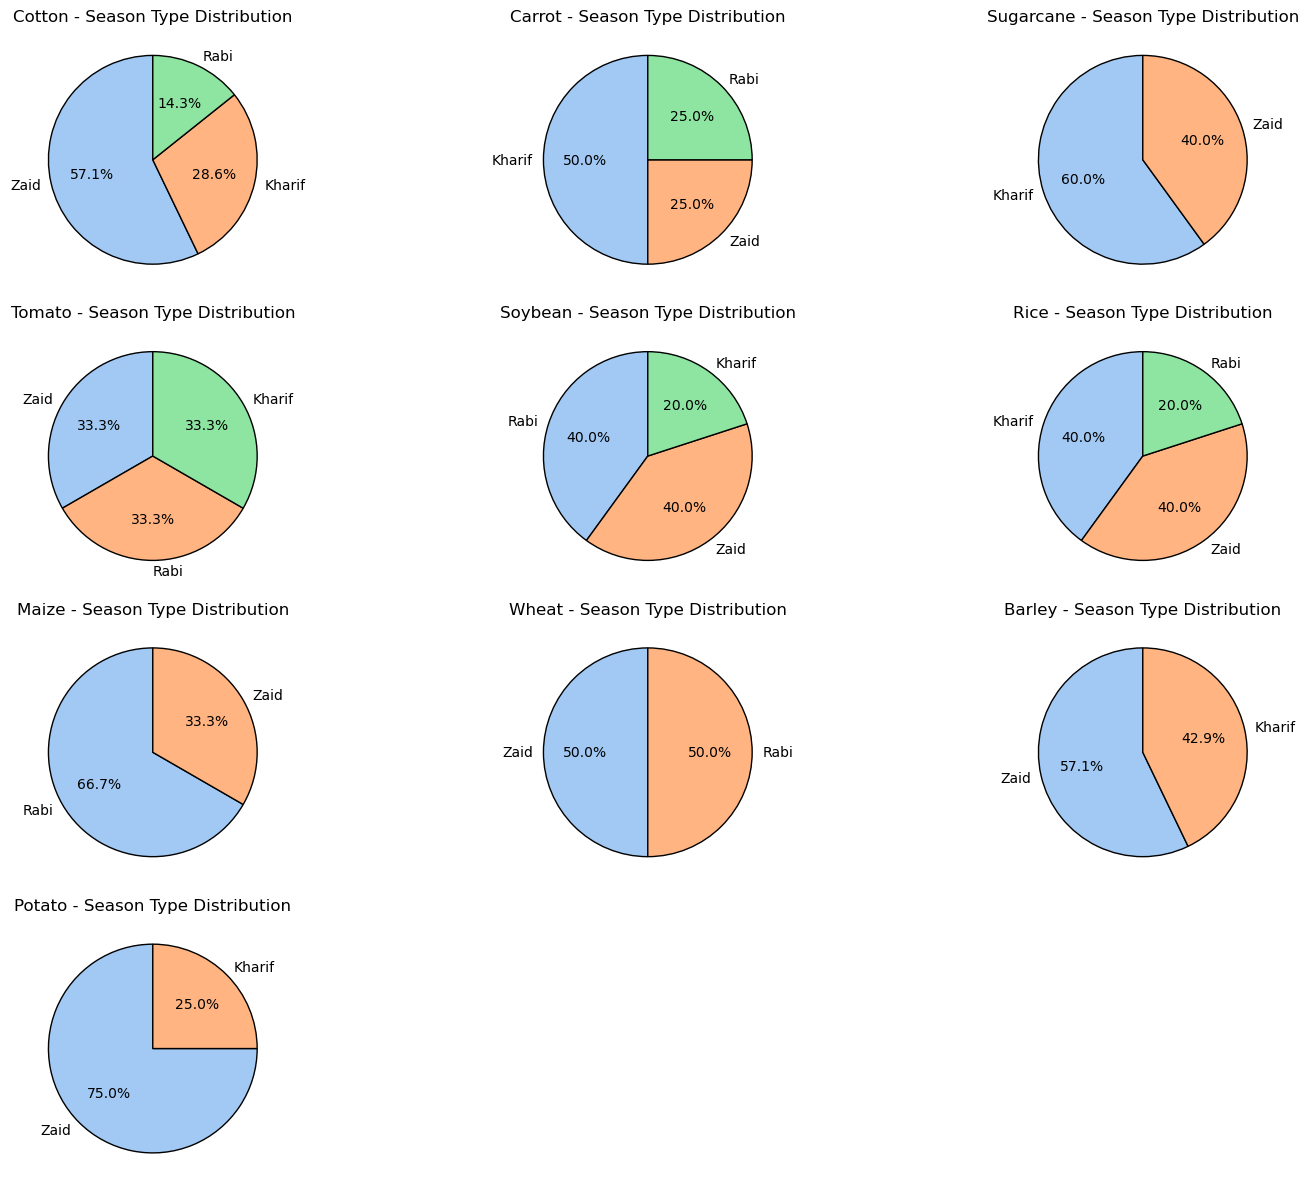

In [8]:
#Now,lets work on Crop_Type and the seasons thay are growing in
Agriculture_season=Agriculture.groupby("Crop_Type")["Season"].unique().reset_index();Agriculture_season
#Now,lets create some pie charts on Crop_Types based on season
unique_value=Agriculture["Crop_Type"].unique()
# Set up a grid for multiple pie charts
plt.figure(figsize=(15, 12))
for i, crop in enumerate(unique_value, 1):
    plt.subplot(4, 3, i)
    season_distribution = Agriculture[Agriculture['Crop_Type'] == crop]['Season'].value_counts()
    plt.pie(season_distribution, labels=season_distribution.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
    plt.title(f'{crop} - Season Type Distribution')

plt.tight_layout()
plt.show()

In [9]:
#Now,lets compute maximum and minimum yield for each crop and soil type
final=Agriculture.groupby(["Crop_Type","Soil_Type"])["Yield(tons)"].mean().reset_index();final
Yield_final_max=final.loc[final.groupby(["Crop_Type"])["Yield(tons)"].idxmax()];display(Yield_final_max)
Yield_final_min=final.loc[final.groupby(["Crop_Type"])["Yield(tons)"].idxmin()];display(Yield_final_min)

,Crop_Type,Soil_Type,Yield(tons)
1,Barley,Loamy,46.470
5,Carrot,Loamy,47.700
9,Cotton,Sandy,28.820
12,Maize,Sandy,39.960
14,Potato,Sandy,31.470
16,Rice,Clay,33.655
19,Soybean,Loamy,40.150
23,Sugarcane,Loamy,38.180
26,Tomato,Clay,43.280
32,Wheat,Silty,36.900


,Crop_Type,Soil_Type,Yield(tons)
2,Barley,Sandy,17.440000
4,Carrot,Clay,27.955000
8,Cotton,Loamy,13.485000
11,Maize,Peaty,3.860000
15,Potato,Silty,20.530000
18,Rice,Silty,4.230000
20,Soybean,Sandy,28.983333
22,Sugarcane,Clay,17.185000
27,Tomato,Loamy,12.920000
30,Wheat,Clay,18.070000


In [10]:
#Identifying soil type with the highest fertilizer used for each case
#Now,lets compute maximum and minimum yield for each crop and soil type
Agriculture_stats_fertilizer = Agriculture.groupby(
    ["Crop_Type", "Soil_Type"]
)["Fertilizer_Used(tons)"].mean().reset_index()

maximum_fertilizer=Agriculture_stats_fertilizer.loc[Agriculture_stats_fertilizer.groupby("Crop_Type")["Fertilizer_Used(tons)"].idxmax()]
minimum_fertilizer=Agriculture_stats_fertilizer.loc[Agriculture_stats_fertilizer.groupby("Crop_Type")["Fertilizer_Used(tons)"].idxmin()]
display(maximum_fertilizer)
display(minimum_fertilizer)

,Crop_Type,Soil_Type,Fertilizer_Used(tons)
1,Barley,Loamy,7.790
5,Carrot,Loamy,5.890
8,Cotton,Loamy,6.245
10,Maize,Loamy,4.910
13,Potato,Loamy,9.430
16,Rice,Clay,7.165
21,Soybean,Silty,8.570
23,Sugarcane,Loamy,6.420
26,Tomato,Clay,8.330
30,Wheat,Clay,6.105


,Crop_Type,Soil_Type,Fertilizer_Used(tons)
2,Barley,Sandy,2.900
6,Carrot,Peaty,4.770
9,Cotton,Sandy,2.100
11,Maize,Peaty,0.570
14,Potato,Sandy,3.860
17,Rice,Sandy,4.595
19,Soybean,Loamy,1.180
22,Sugarcane,Clay,1.895
27,Tomato,Loamy,4.750
32,Wheat,Silty,1.790


In [11]:
#Identifying soil type with the highest fertilizer used for each case
#Now,lets compute maximum and minimum yield for each crop and soil type
Agriculture_stats_water = Agriculture.groupby(
    ["Crop_Type", "Soil_Type"]
)["Water_Usage(cubic meters)"].mean().reset_index()

maximum_water=Agriculture_stats_water.loc[Agriculture_stats_water.groupby("Crop_Type")["Water_Usage(cubic meters)"].idxmax()]
minimum_water=Agriculture_stats_water.loc[Agriculture_stats_water.groupby("Crop_Type")["Water_Usage(cubic meters)"].idxmin()]
display(maximum_water)
display(minimum_water)

,Crop_Type,Soil_Type,Water_Usage(cubic meters)
1,Barley,Loamy,93656.060
5,Carrot,Loamy,88301.460
8,Cotton,Loamy,57761.240
11,Maize,Peaty,60202.140
14,Potato,Sandy,86989.880
17,Rice,Sandy,78580.925
19,Soybean,Loamy,73646.550
25,Sugarcane,Silty,75538.560
26,Tomato,Clay,93718.690
31,Wheat,Loamy,65838.400


,Crop_Type,Soil_Type,Water_Usage(cubic meters)
3,Barley,Silty,39956.880000
6,Carrot,Peaty,68725.540000
7,Cotton,Clay,49551.673333
10,Maize,Loamy,18660.030000
15,Potato,Silty,5874.170000
18,Rice,Silty,9392.380000
21,Soybean,Silty,43610.210000
24,Sugarcane,Peaty,33615.770000
28,Tomato,Peaty,37466.110000
32,Wheat,Silty,23208.040000


In [12]:
#Now,lets work on pesticide use based on the Crop-Type we have
Agriculture_stats_pesticide=Agriculture.groupby(["Crop_Type","Water_Usage(cubic meters)","Soil_Type"])['Pesticide_Used(kg)'].mean().reset_index()
Pesticide_max=Agriculture_stats_pesticide.loc[Agriculture_stats_pesticide.groupby("Crop_Type")["Pesticide_Used(kg)"].idxmax()]
Pesticide_min=Agriculture_stats_pesticide.loc[Agriculture_stats_pesticide.groupby("Crop_Type")["Pesticide_Used(kg)"].idxmin()]
display(Pesticide_max)
display(Pesticide_min)

,Crop_Type,Water_Usage(cubic meters),Soil_Type,Pesticide_Used(kg)
3,Barley,43847.82,Silty,3.57
7,Carrot,68725.54,Peaty,4.36
14,Cotton,39362.44,Clay,4.76
20,Maize,60202.14,Peaty,4.93
21,Potato,5874.17,Silty,3.00
29,Rice,85208.71,Sandy,4.99
33,Soybean,73646.55,Loamy,4.43
39,Sugarcane,88976.51,Clay,2.27
44,Tomato,92745.01,Loamy,4.79
46,Wheat,23208.04,Silty,4.78


,Crop_Type,Water_Usage(cubic meters),Soil_Type,Pesticide_Used(kg)
4,Barley,53879.87,Clay,0.14
10,Carrot,88301.46,Loamy,0.81
12,Cotton,26743.55,Clay,0.91
18,Maize,18660.03,Loamy,0.77
24,Potato,93407.38,Loamy,0.77
26,Rice,9392.38,Silty,0.91
32,Soybean,43610.21,Silty,1.35
38,Sugarcane,75538.56,Silty,0.56
40,Tomato,37466.11,Peaty,0.55
48,Wheat,45922.35,Clay,0.83


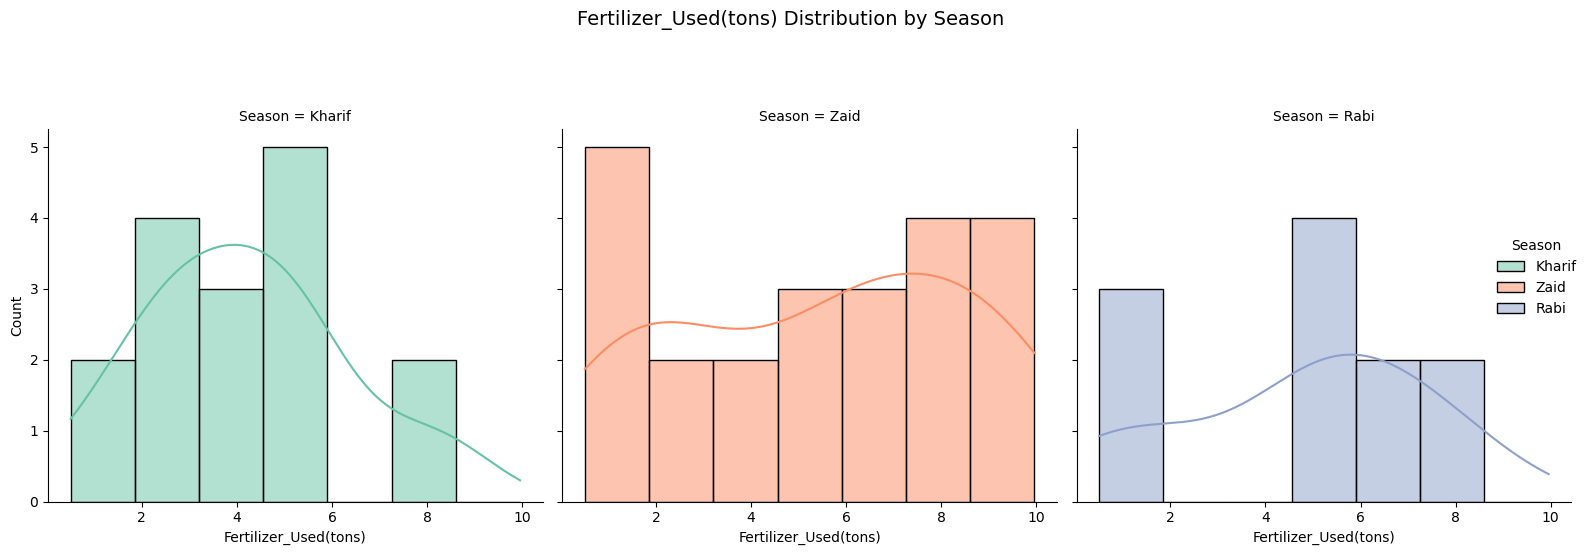

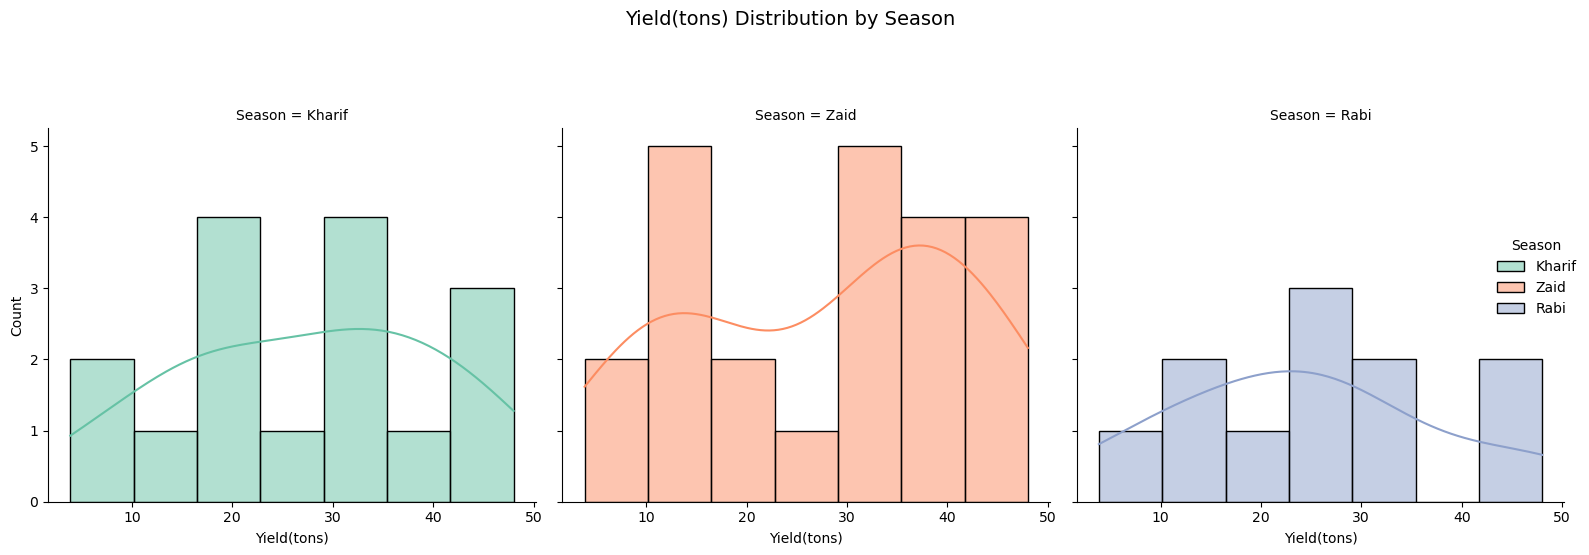

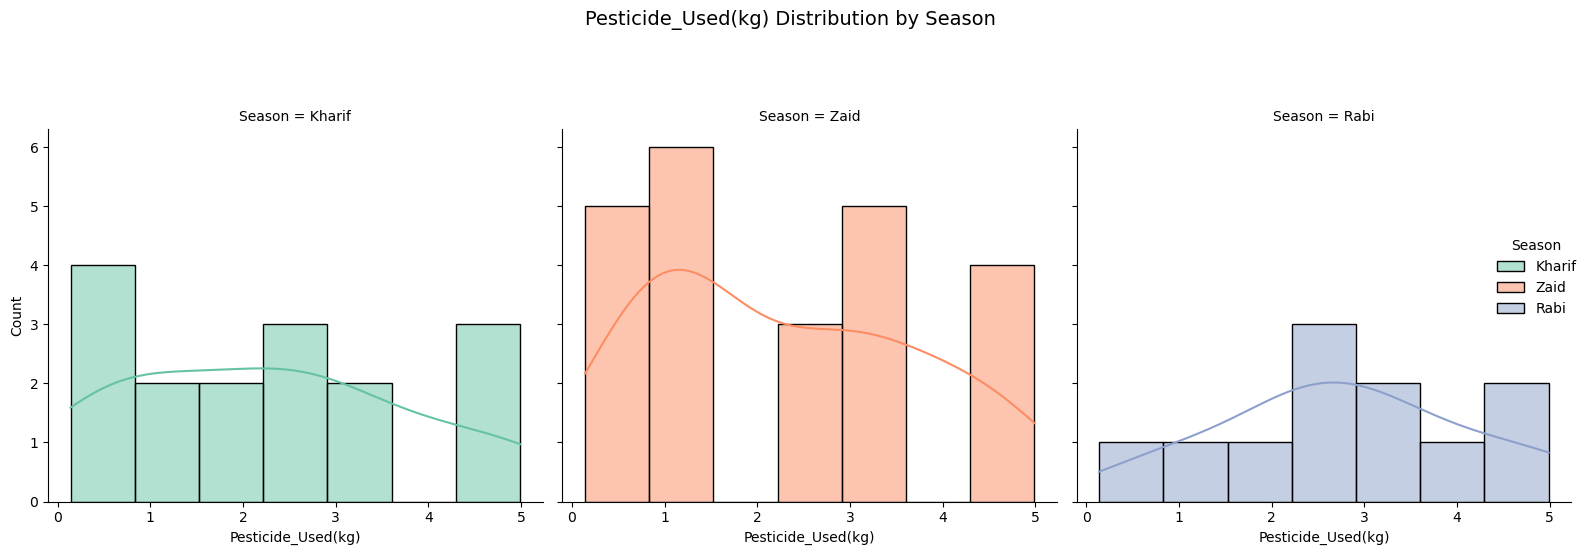

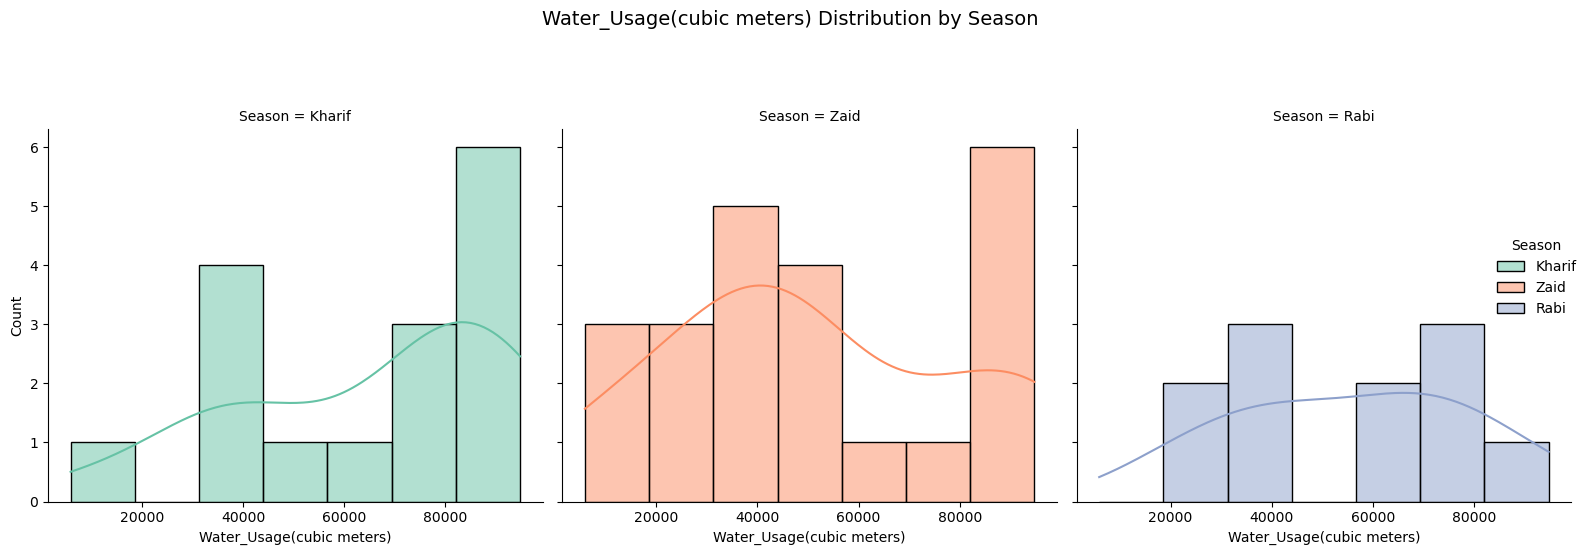

In [13]:
def create_displots_by_season(data, columns, col, hue, palette='Set2'):
    for column in columns:
        g = sns.displot(data=data, x=column, col=col, hue=hue, kde=True, palette=palette)
        g.fig.suptitle(f'{column} Distribution by {col}', fontsize=14, y=1.10)
        plt.tight_layout()
        plt.show()

# List of columns to create distribution plots for
columns_to_plot = ["Fertilizer_Used(tons)", "Yield(tons)", "Pesticide_Used(kg)", "Water_Usage(cubic meters)"]
create_displots_by_season(Agriculture, columns_to_plot, col='Season', hue='Season')

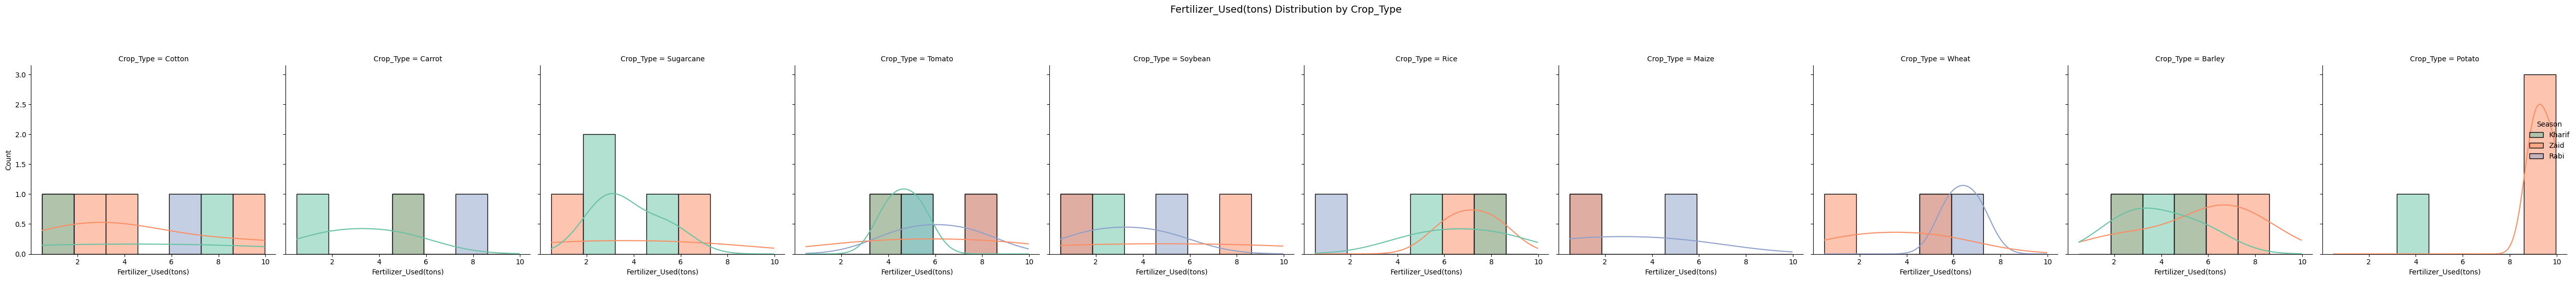

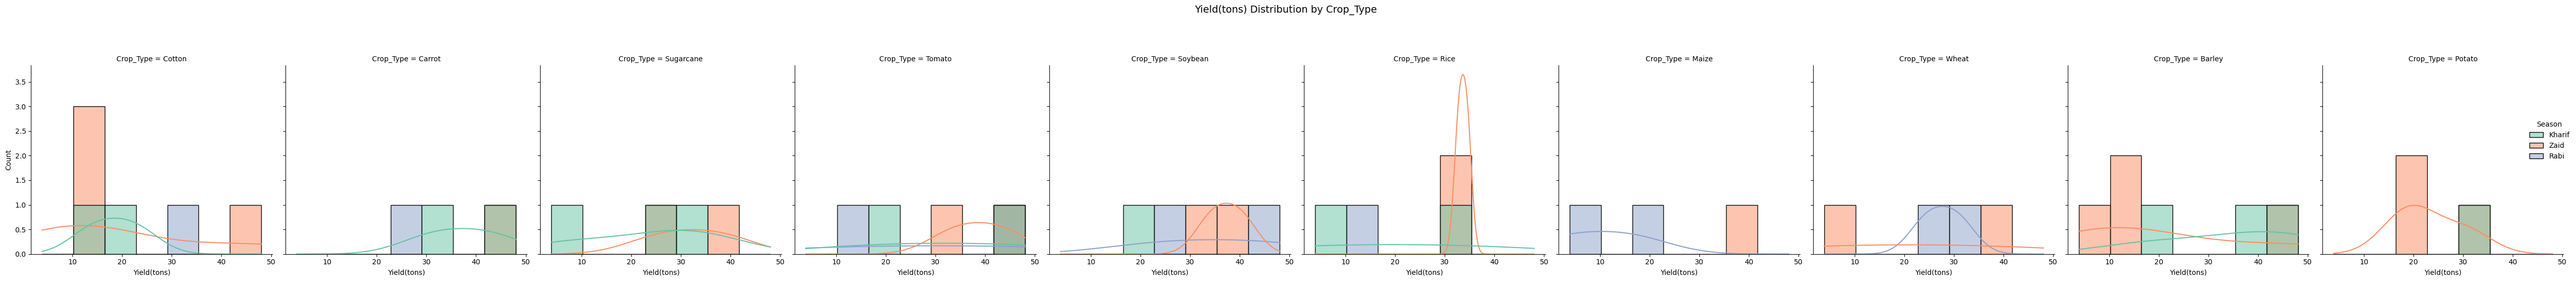

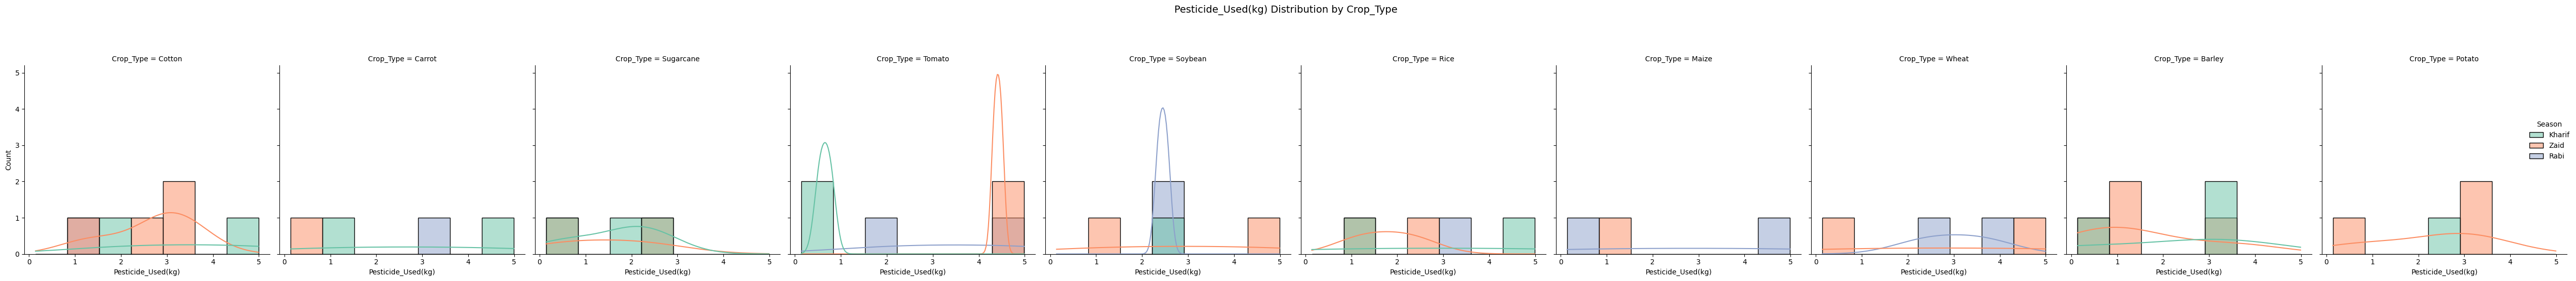

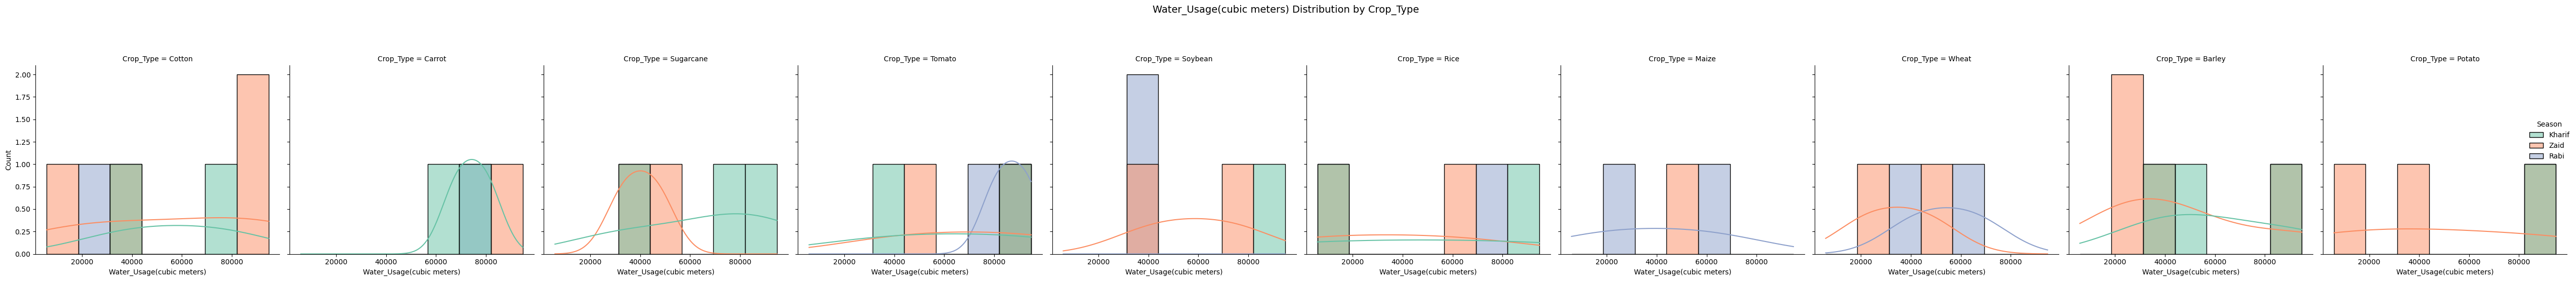

In [14]:
def create_displots_by_season(data, columns, col, hue, palette='Set2'):
    for column in columns:
        g = sns.displot(data=data, x=column, col=col, hue=hue, kde=True, palette=palette)
        g.fig.suptitle(f'{column} Distribution by {col}', fontsize=14, y=1.10)
        plt.tight_layout()
        plt.show()

# List of columns to create distribution plots for
columns_to_plot = ["Fertilizer_Used(tons)", "Yield(tons)", "Pesticide_Used(kg)", "Water_Usage(cubic meters)"]
create_displots_by_season(Agriculture, columns_to_plot, col='Crop_Type', hue='Season')

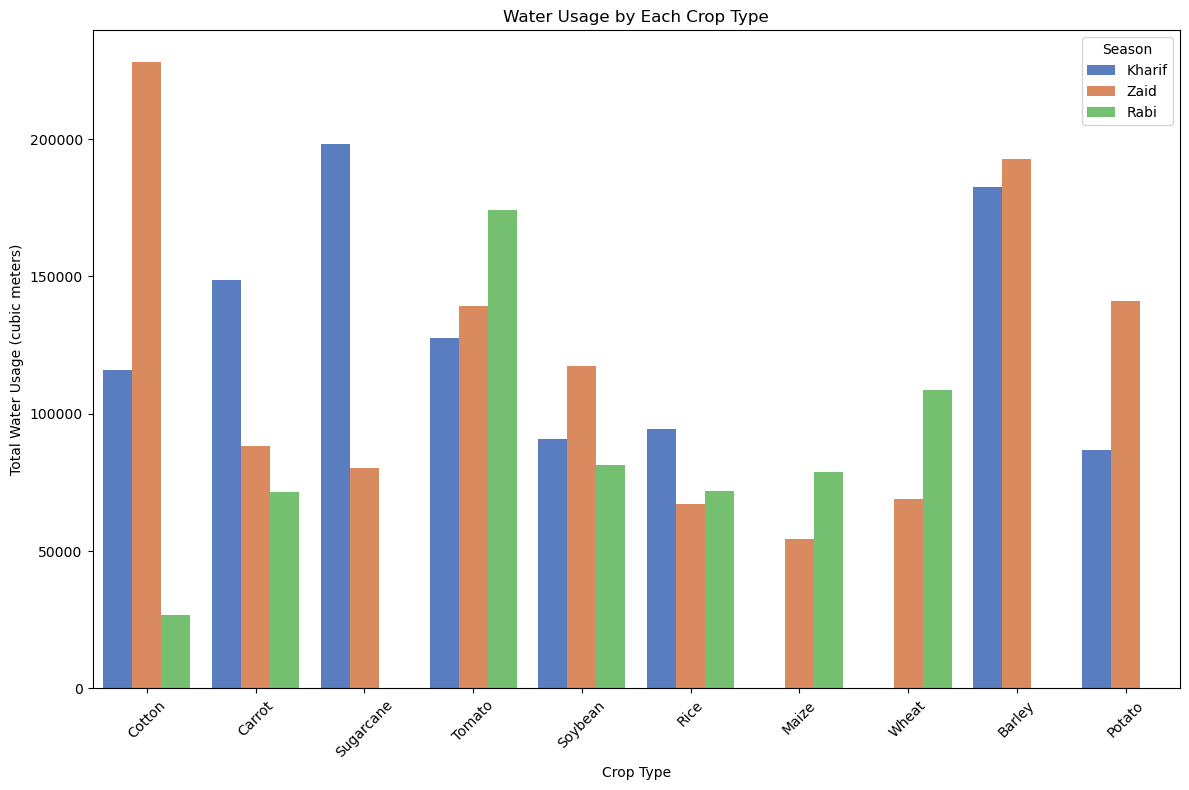

In [15]:
#Now,lets create some others barplots and check the content we want
# Creating a bar plot to visualize total Water_Usage(cubic meters) by season for each crop type
plt.figure(figsize=(12,8))
sns.barplot(data=Agriculture, x="Crop_Type",y="Water_Usage(cubic meters)",hue="Season",estimator=sum, ci=None, palette='muted')
plt.title("Water Usage by Each Crop Type")
plt.xlabel('Crop Type')
plt.ylabel('Total Water Usage (cubic meters)')
plt.legend(title="Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

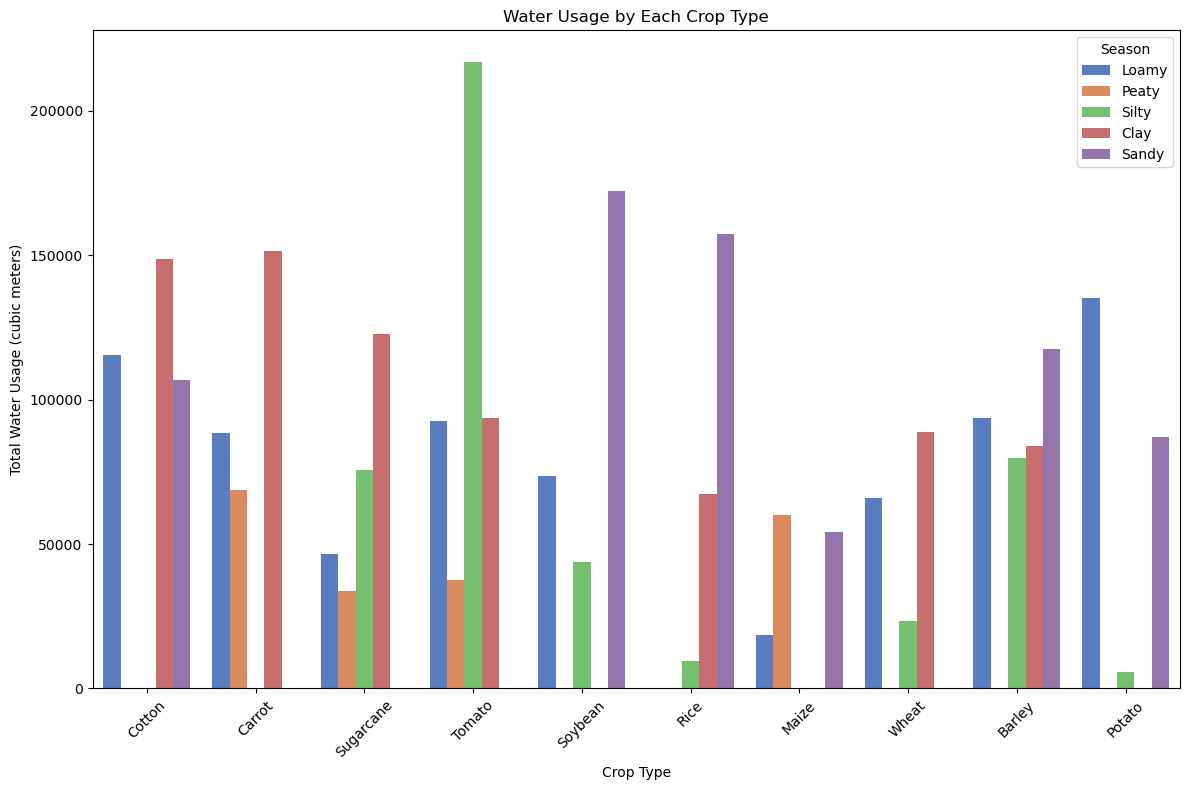

In [16]:
#Now,lets do it also for each crop type
plt.figure(figsize=(12,8))
sns.barplot(data=Agriculture, x="Crop_Type",y="Water_Usage(cubic meters)",hue="Soil_Type",estimator=sum, ci=None, palette='muted')
plt.title("Water Usage by Each Crop Type")
plt.xlabel('Crop Type')
plt.ylabel('Total Water Usage (cubic meters)')
plt.legend(title="Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

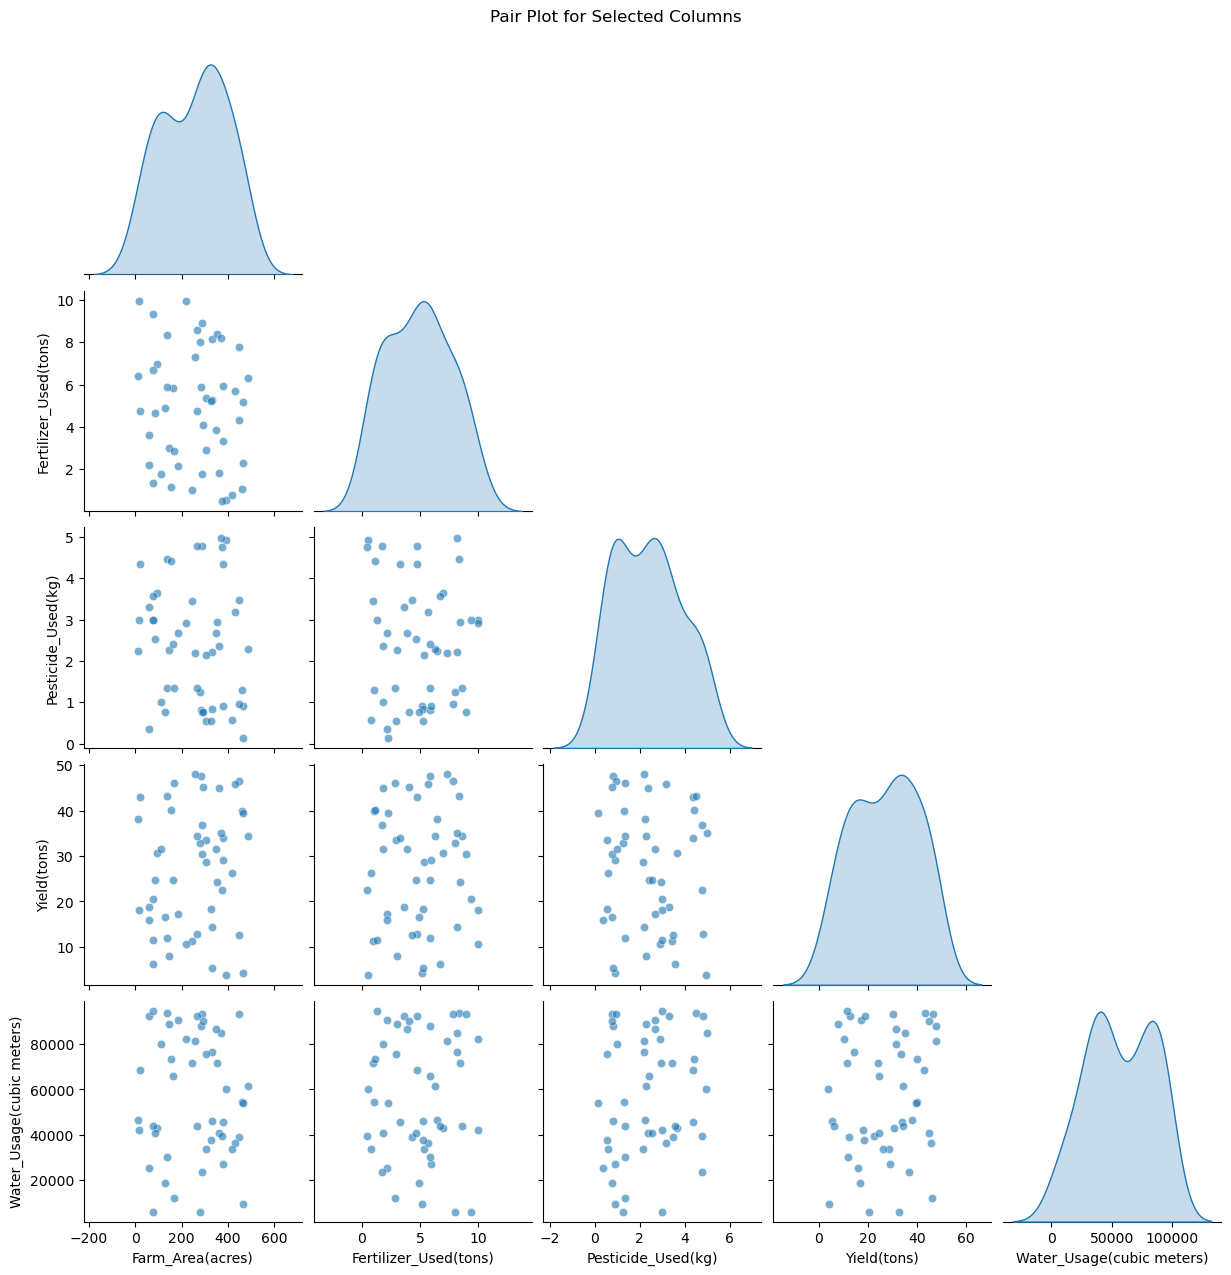

In [17]:
# Creating a pair plot for the specified columns
columns_to_pairplot = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

sns.pairplot(Agriculture[columns_to_pairplot], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot for Selected Columns', y=1.02)
plt.show()

In [18]:
# Now, lets try apply one-hot encoder to our dataset
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


categorical_columns = Agriculture.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(Agriculture[categorical_columns])

one_hot_Agriculture = pd.DataFrame(
    one_hot_encoded,
    columns=encoder.get_feature_names_out(categorical_columns),
    index=Agriculture.index  # ← ΠΟΛΥ ΣΗΜΑΝΤΙΚΟ
)

df_encoded = pd.concat([Agriculture, one_hot_Agriculture], axis=1)

df_encoded = df_encoded.drop(columns=categorical_columns)

display(df_encoded)

,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters),Crop_Type_Barley,Crop_Type_Carrot,Crop_Type_Cotton,Crop_Type_Maize,Crop_Type_Potato,...,Irrigation_Type_Rain-fed,Irrigation_Type_Sprinkler,Soil_Type_Clay,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silty,Season_Kharif,Season_Rabi,Season_Zaid
Farm_ID,,,,,,,,,,,,,,,,,,,,,
F001,329.40,8.14,2.21,14.44,76648.20,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
F002,18.67,4.77,4.36,42.91,68725.54,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
F003,306.03,2.91,0.56,33.44,75538.56,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
F004,380.21,3.32,4.35,34.08,45401.23,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
F005,135.56,8.33,4.48,43.28,93718.69,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
F006,12.50,6.42,2.25,38.18,46487.98,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
F007,360.06,1.83,2.37,44.93,40583.57,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
F008,464.60,5.18,0.91,4.23,9392.38,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
F009,389.37,0.57,4.93,3.86,60202.14,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


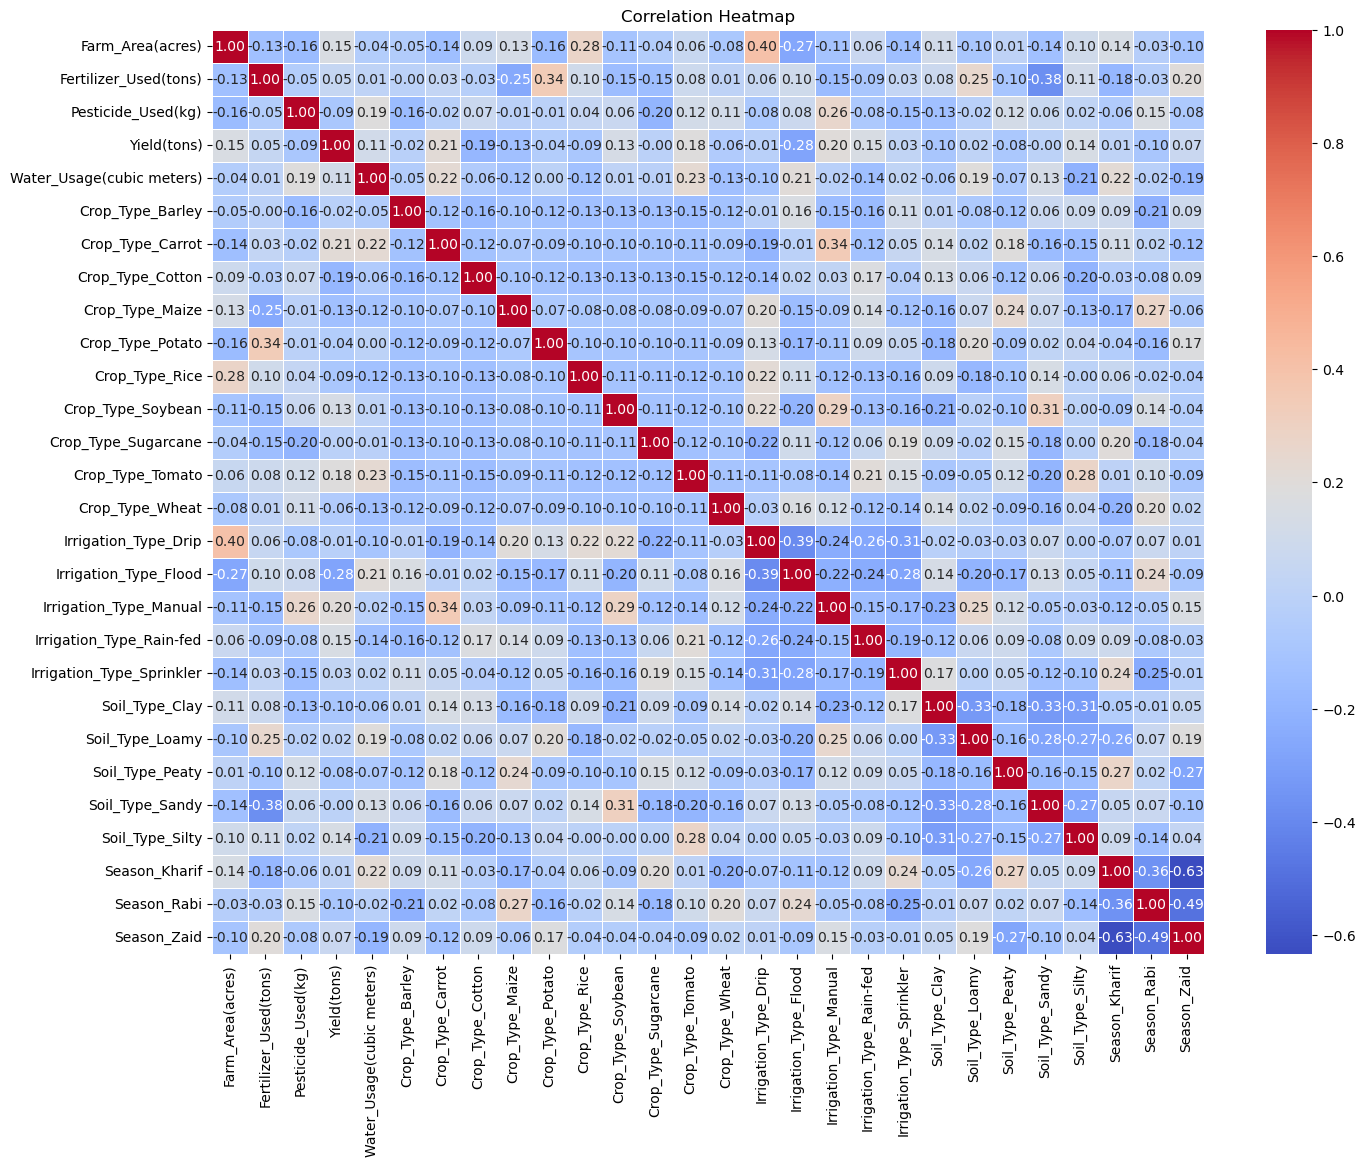

In [19]:
#Now, the we finished with data preprocessing,lets apply the heatmap
corr_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
#Now,lets work on the models we already have created
# Random Forest Regression on Agriculture Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import numpy as np

X = df_encoded.drop(columns=['Yield(tons)'])  # Features
y = df_encoded['Yield(tons)']  # Target
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Random Forest Regressor
rf_regressor = RandomForestRegressor( random_state=42)

# Train
rf_regressor.fit(X_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 156.44
R-squared Score: 0.02


In [22]:
#Now,lets try and apply XGBoost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load dataset
Agriculture_revised=Agriculture.iloc[:,0:6]


# Identify your features and target
y = Agriculture_revised["Yield(tons)"]
X = Agriculture_revised.drop(columns=["Yield(tons)"])

# Convert categoricals
cat_cols = X.select_dtypes(include=["object"]).columns
for col in cat_cols:
    X[col] = X[col].astype("category")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost model with categorical support
model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    enable_categorical=True,
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("MSE:", mse)
print("R2:", r2)

MSE: 204.08926553804355
R2: -0.27809697706741443


In [23]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Agriculture_revised=Agriculture.iloc[:,0:6]
# Identify your features and target
y = Agriculture_revised["Yield(tons)"]
X = Agriculture_revised.drop(columns=["Yield(tons)"])

# Convert categoricals
cat_cols = X.select_dtypes(include=["object"]).columns
for col in cat_cols:
    X[col] = X[col].astype("category")

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

# Predict
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("MSE:", mse)
print("R2:", r2)


MSE: 156.99174289389487
R2: 0.23624474918878335


In [24]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Target + Features
y = df_encoded["Yield(tons)"]
X = df_encoded.drop(columns=["Yield(tons)"])


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Model
model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    verbose=0
)

# FIT with categorical features
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)

MSE: 162.77610541361483
R2: -0.028924230083018143


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np




X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, 
    y, 
    test_size=0.2, 
    random_state=42
)
# Create and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=7)
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# --- 7. EVALUATE MODEL ---

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("K-Nearest Neighbors Regression Results (N=5):")
print("-" * 45)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R²): {r2:.4f}')

K-Nearest Neighbors Regression Results (N=5):
---------------------------------------------
Mean Squared Error (MSE): 217.5719
Root Mean Squared Error (RMSE): 14.7503
R-squared (R²): -0.3625
